<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [1]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
%matplotlib inline

In [2]:
from typing import List


# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    # add your code here
    url = 'https://archive-api.open-meteo.com/v1/archive'
    params = {
        'latitude': latitude,
        'longitude': longitude,
        'start_date': start_date,
        'end_date': end_date,
        'daily': features,
        'timezone': 'GMT'
    }
    response = requests.get(url, params=params)
    return response.json()
    

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [3]:
# add your code here
data = acquire_data(latitude=51.5085, longitude=-0.1257, start_date='1950-01-01', end_date='1954-12-31', features=['temperature_2m_mean','temperature_2m_max', 'temperature_2m_min', 'precipitation_sum'])
df = pd.DataFrame(data)
df

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
time,51.5,-0.099991,1.852036,0,GMT,GMT,23.0,iso8601,"[1950-01-01, 1950-01-02, 1950-01-03, 1950-01-0..."
temperature_2m_mean,51.5,-0.099991,1.852036,0,GMT,GMT,23.0,°C,"[1.1, 6.7, 10.4, 9.2, 8.1, 6.3, 9.2, 6.8, 5.1,..."
temperature_2m_max,51.5,-0.099991,1.852036,0,GMT,GMT,23.0,°C,"[3.8, 10.4, 11.1, 10.5, 9.5, 9.1, 12.4, 9.5, 8..."
temperature_2m_min,51.5,-0.099991,1.852036,0,GMT,GMT,23.0,°C,"[-1.8, -0.3, 9.9, 7.9, 5.6, 3.6, 7.2, 3.8, 3.0..."
precipitation_sum,51.5,-0.099991,1.852036,0,GMT,GMT,23.0,mm,"[0.0, 0.0, 0.5, 0.0, 3.0, 0.7, 0.0, 0.0, 0.0, ..."


In [4]:
time_series = pd.DataFrame(data["daily"])
time_series

,time,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum
0,1950-01-01,1.1,3.8,-1.8,0.0
1,1950-01-02,6.7,10.4,-0.3,0.0
2,1950-01-03,10.4,11.1,9.9,0.5
3,1950-01-04,9.2,10.5,7.9,0.0
4,1950-01-05,8.1,9.5,5.6,3.0
...,...,...,...,...,...
1821,1954-12-27,6.9,9.1,5.2,0.0
1822,1954-12-28,6.8,8.9,4.6,0.0
1823,1954-12-29,7.1,8.6,6.2,0.0
1824,1954-12-30,6.2,7.7,5.1,0.1


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


In [5]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str, figsize: tuple=(6.4, 4.8)) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    return fig, ax

In [6]:
time = time_series['time']
date_format = "%Y-%m-%d"
time_in_datetime = [datetime.strptime(t, date_format) for t in time]
time_diff = [(t-datetime(1950, 1, 1)).days for t in time_in_datetime]
mean_temp = time_series['temperature_2m_mean']
max_temp = time_series['temperature_2m_max']
min_temp = time_series['temperature_2m_min']
prec = time_series['precipitation_sum']

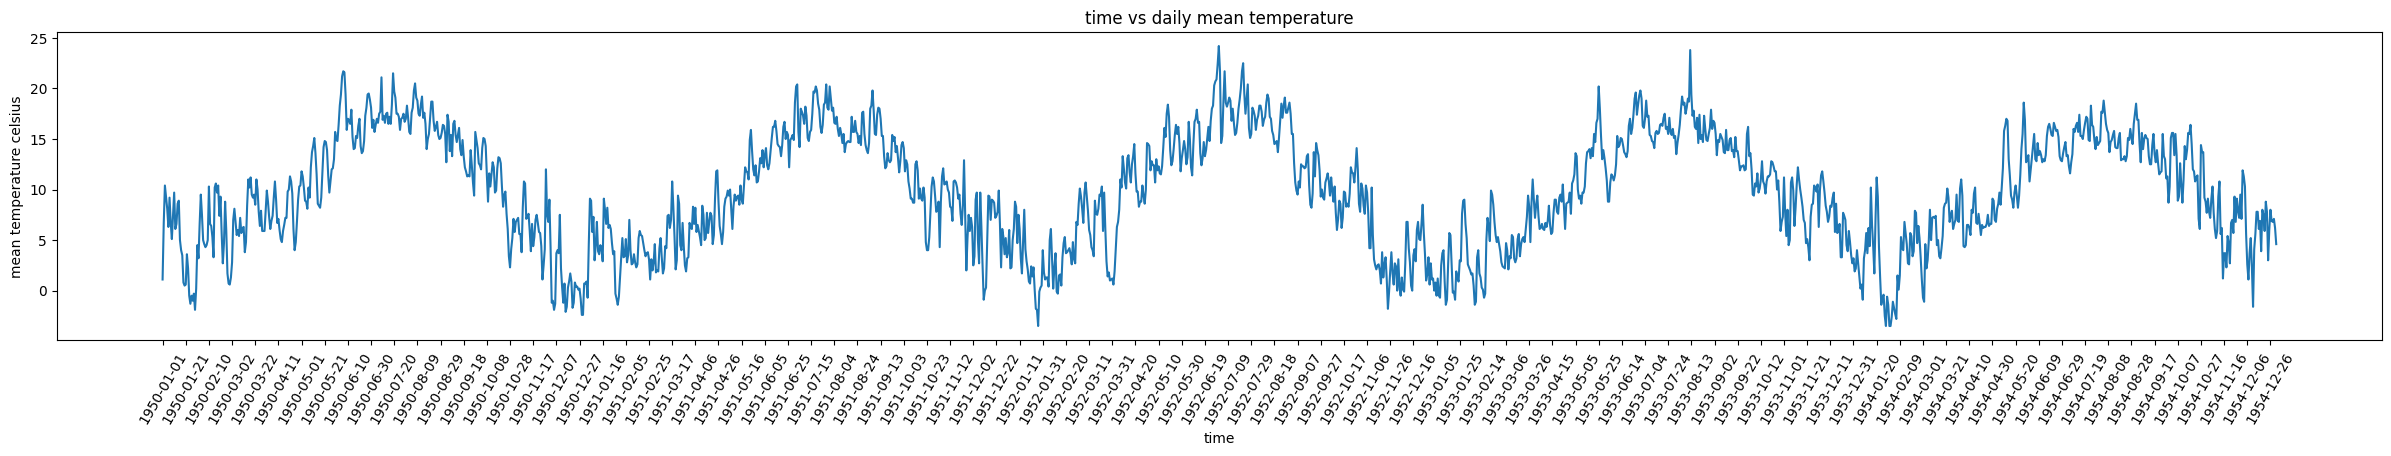

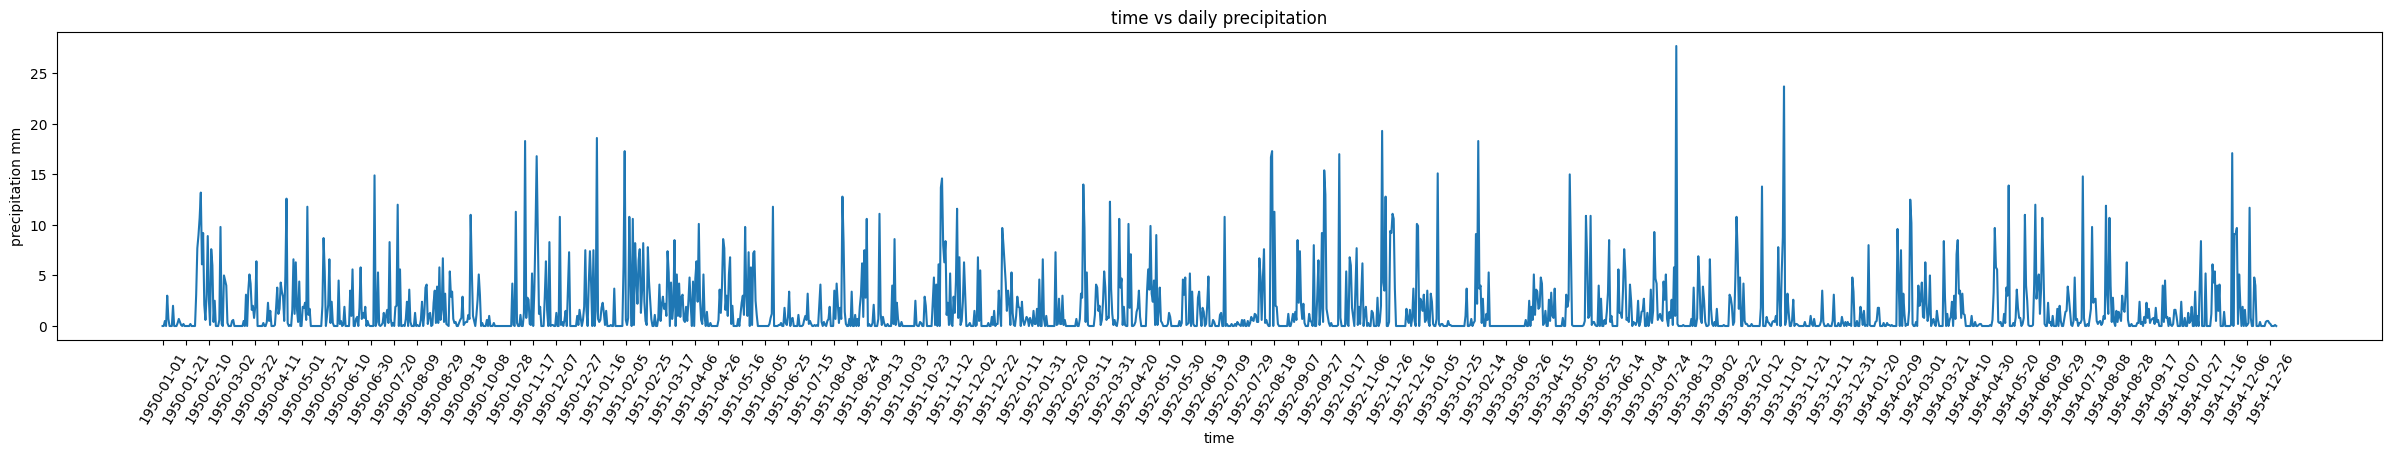

In [7]:
fig_temp, ax_temp = lineplot(time, mean_temp, 'time vs daily mean temperature', x_label='time', y_label='mean temperature celsius', figsize=(30, 4))
ax_temp.set_xticks(time[::20])
ax_temp.set_xticklabels(time[::20], rotation=60)
fig_temp.savefig('time_meantemp.png', bbox_inches='tight')
fig_prec, ax_prec = lineplot(time, prec, 'time vs daily precipitation', x_label='time', y_label='precipitation mm', figsize=(30,4))
ax_prec.set_xticks(time[::20])
ax_prec.set_xticklabels(time[::20], rotation=60)
fig_prec.savefig('time_precipitation.png', bbox_inches='tight')

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [8]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str], figsize: tuple=(6.4, 4.8)) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(figsize=figsize)
    for idx, y in enumerate(ys):
        ax.plot(x, y, label = legend[idx])
    ax.legend()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return fig, ax

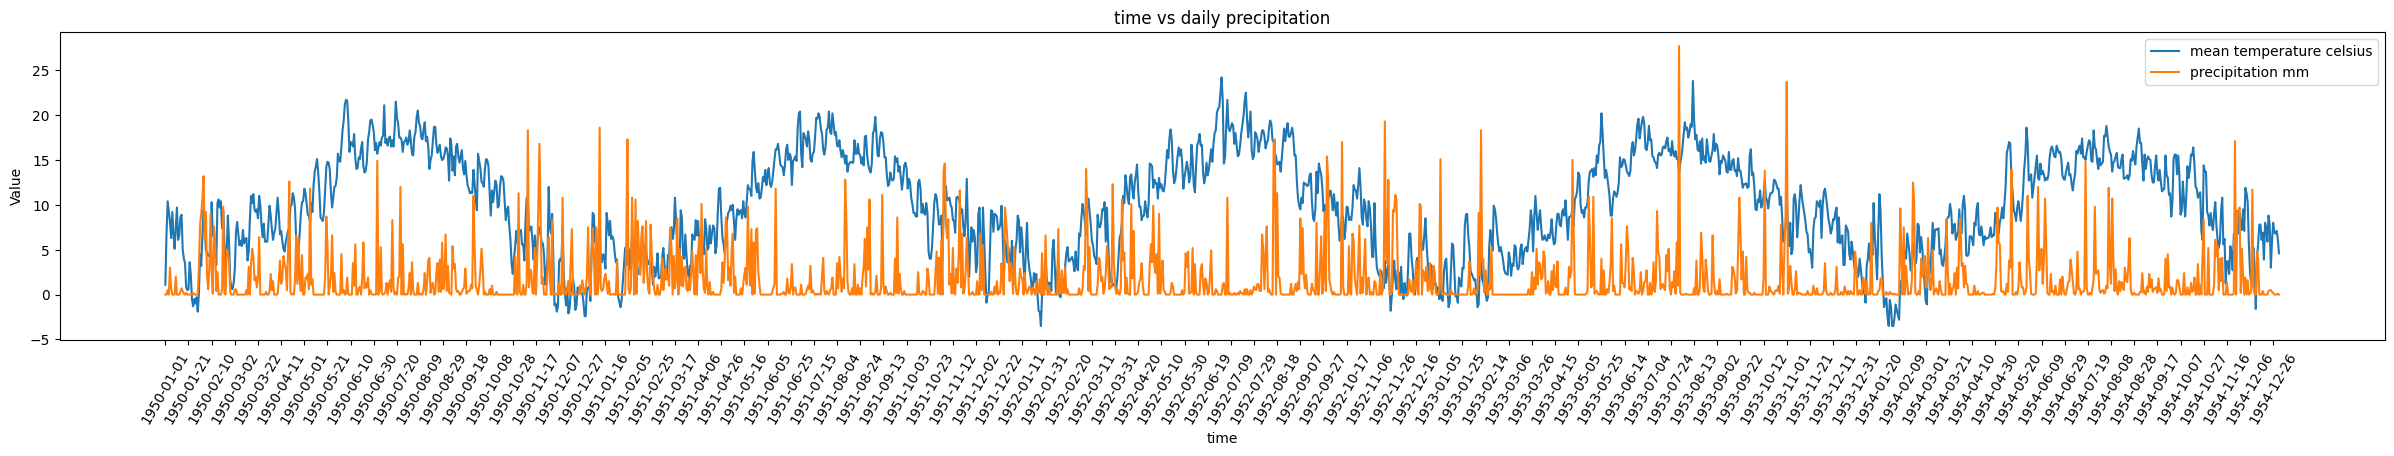

In [9]:
fig_mul_var, ax_mul_var = lineplots(time, [mean_temp, prec], 'time vs daily precipitation', x_label='time', y_label='Value', \
                                    legend=['mean temperature celsius', 'precipitation mm'], figsize=(30, 4))
ax_mul_var.set_xticks(time[::20])
ax_mul_var.set_xticklabels(time[::20], rotation=60);

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


In [10]:
# add your code here
def shaded_area_plots(x: ArrayLike, y_mean: ArrayLike, y_max: ArrayLike, y_min: ArrayLike, title: str, x_label: str, y_label: str, figsize: tuple=(6.4, 4.8)) -> (plt.Figure, plt.Axes):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y_mean)
    ax.fill_between(x, y_min, y_max, alpha=0.3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return fig, ax

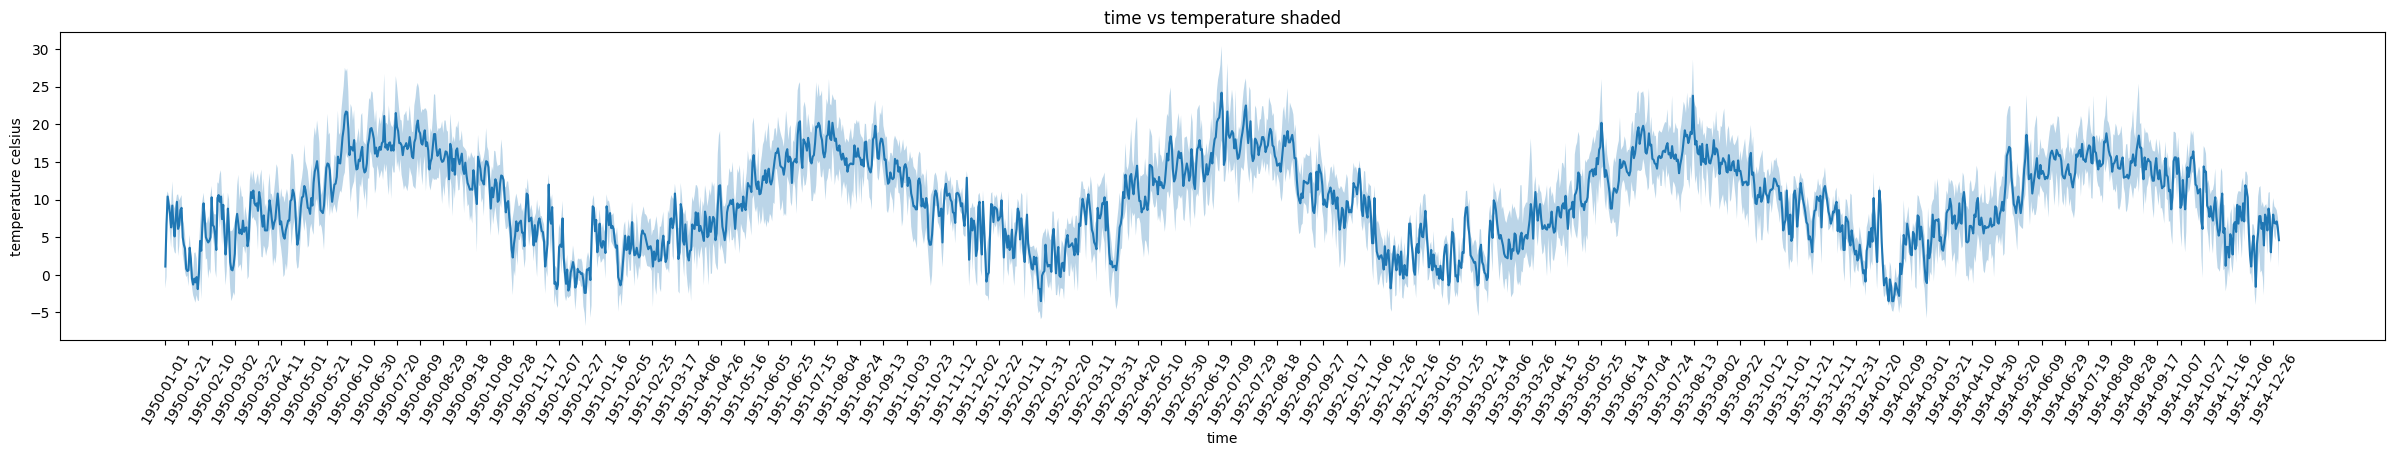

In [11]:
fig_shaded, ax_shaded = shaded_area_plots(time, y_mean=mean_temp, y_max=max_temp, y_min=min_temp, title='time vs temperature shaded',\
                                           x_label='time', y_label='temperature celsius', figsize=(30, 4))
ax_shaded.set_xticks(time[::20])
ax_shaded.set_xticklabels(time[::20], rotation=60);

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [12]:
import numpy as np
import copy

def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x_copy = copy.deepcopy(x)
    x_min = np.min(x_copy)
    x_max = np.max(x_copy)
    for idx, i in enumerate(x_copy):
        x_copy[idx] = (i-x_min)/(x_max-x_min)
    return x_copy
    

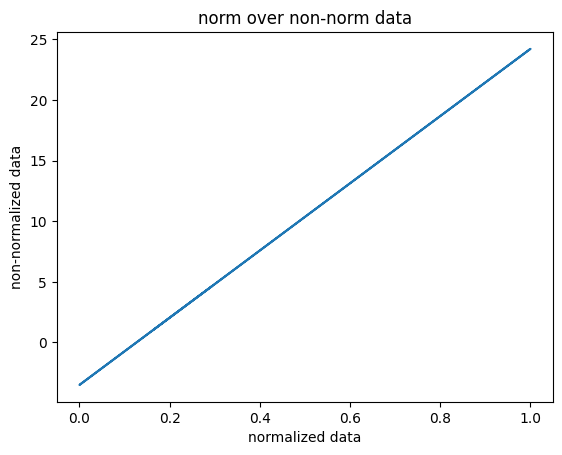

In [13]:
mm_norm = minmax_norm(mean_temp)
fig_mm_norm, ax_mm_norm = lineplot(mm_norm, mean_temp, title='norm over non-norm data', x_label='normalized data', y_label='non-normalized data')

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [14]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x_copy = copy.deepcopy(x)
    mean = np.mean(x_copy)
    std = np.std(x_copy)
    for idx, i in enumerate(x_copy):
        x_copy[idx] = (i-mean)/std
    return x_copy

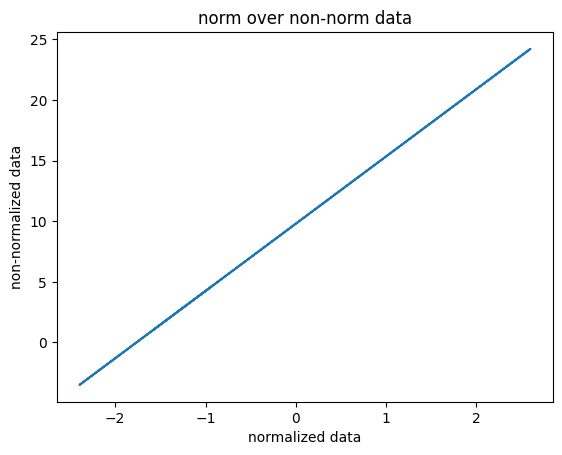

In [15]:
z_norm = zscore_norm(mean_temp)
fig_z_norm, ax_z_norm = lineplot(z_norm, mean_temp, title='norm over non-norm data', x_label='normalized data', y_label='non-normalized data')

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [16]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    outliers = []
    mean = np.mean(x)
    std = np.std(x)
    for idx, i in enumerate(x):
        if (i-mean)/std > threshold:
            outliers.append(idx)
    return outliers

In [17]:
print(zscore_outliers(mean_temp))
print(zscore_outliers(mean_temp, threshold=2))

[]
[155, 156, 157, 189, 199, 910, 911, 912, 913, 917, 932, 933, 1319]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [18]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    ax.plot(x[outliers_idx], y[outliers_idx], 'ro', markerfacecolor='None')
    return ax

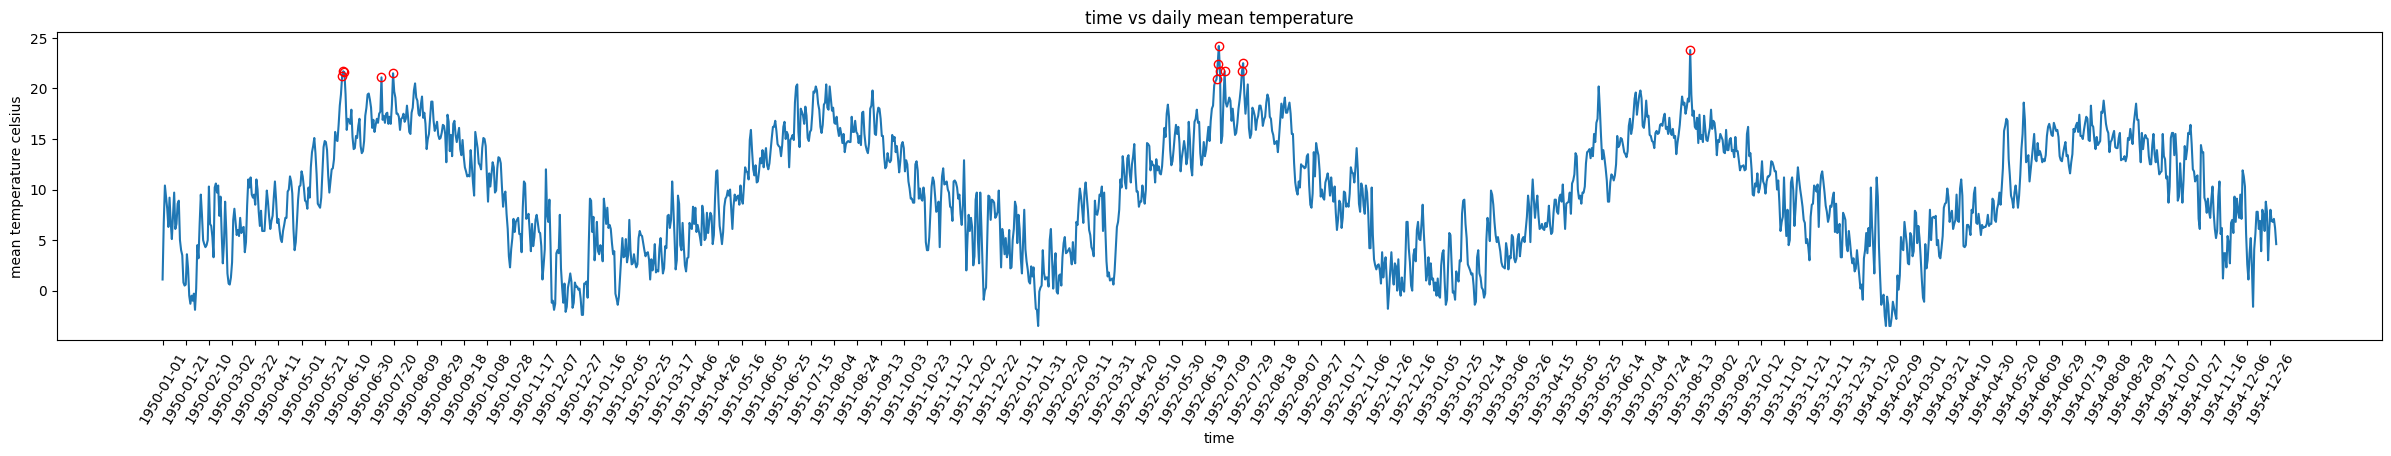

In [19]:
from IPython.display import display
outliers_idx = zscore_outliers(mean_temp, threshold=2)
ax_temp_outliers = mark_outliers(ax_temp, time, mean_temp, outliers_idx)
display(fig_temp)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [20]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)
    IQR = Q3-Q1
    lower_bound = Q1-threshold*IQR
    upper_bound = Q3+threshold*IQR
    outliers = [idx for idx, i in enumerate(x) if i <lower_bound or i>upper_bound]
    return outliers

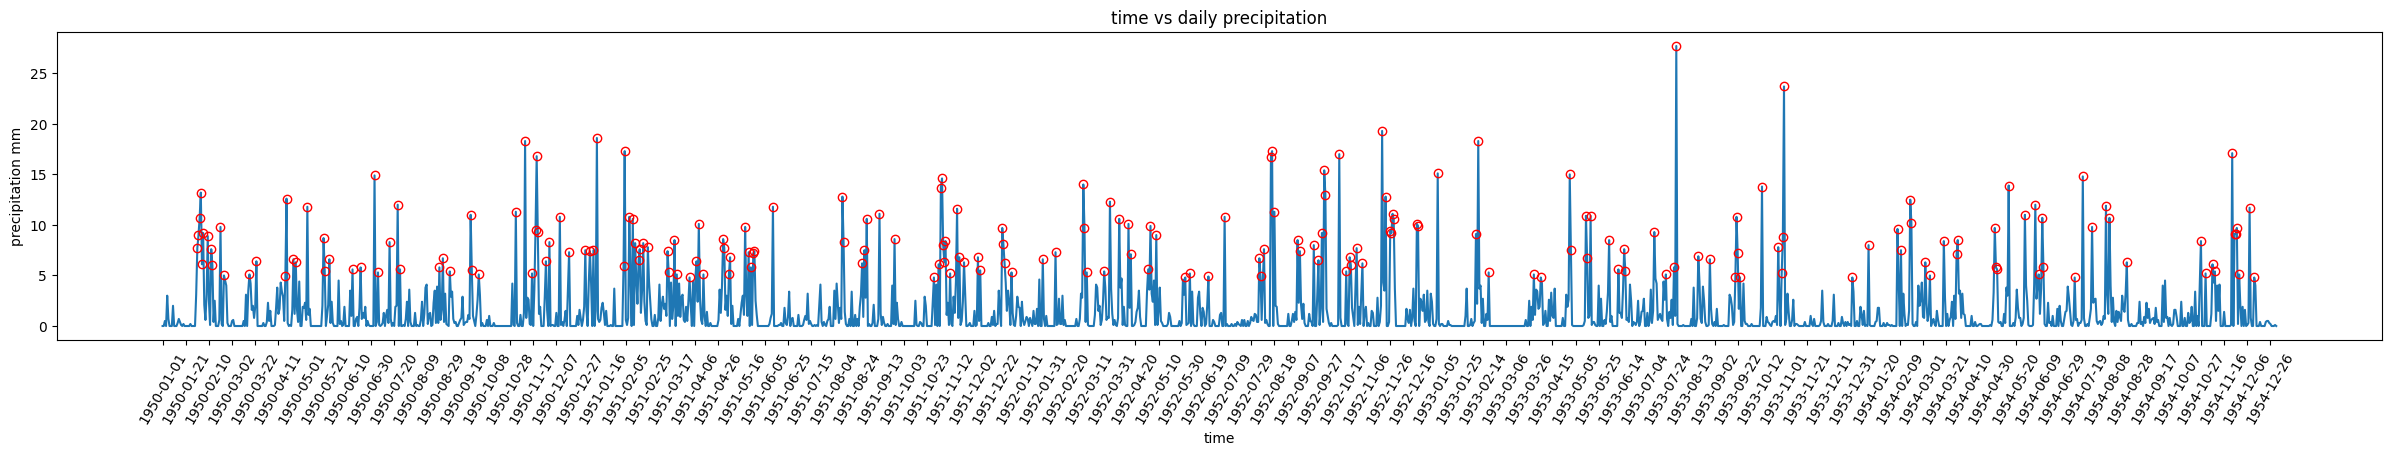

In [21]:
outliers_idx = iqr_detect(prec, threshold=1.5)
ax_prec_outliers = mark_outliers(ax_prec, time, prec, outliers_idx)
display(fig_prec)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [22]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    quantile_10 = np.quantile(x, 0.1)
    quantile_90 = np.quantile(x, 0.9)
    mean = np.mean(x)
    std = np.std(x)
    clamped_data = np.array(x)
    for idx, i in enumerate(x):
        z_score = (i-mean)/std
        if abs(z_score) > threshold:
            clamped_data[idx] = quantile_10 if z_score < 0 else quantile_90
    return clamped_data

In [23]:
def scatter_plot(x: ArrayLike, y: ArrayLike):
    plt.figure(figsize=(10, 6))
    plt.plot(x, 'ro', label="Original Data", markerfacecolor='None')
    plt.plot(y, 'bo', label="Current Data", markerfacecolor='None')
    changed_idx = np.where(x!=y)[0]
    plt.plot(changed_idx, y[changed_idx], 'yo', label="After modification", markersize=3)
    plt.legend()
    plt.title("Original vs Modified Data")

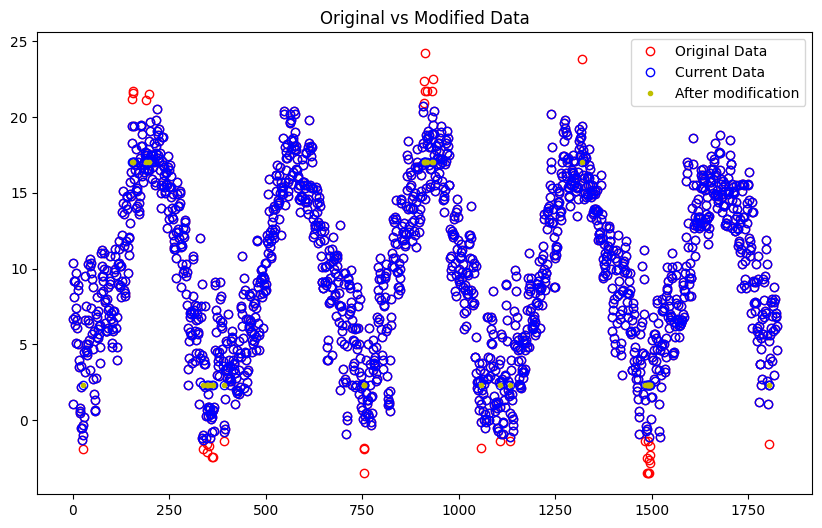

In [24]:
clamped_temp = zscore_clamp(mean_temp, threshold=2)
# fig_clamped, ax_clamped = lineplot(clamped_temp, mean_temp, title='clamped over non-clamped data', x_label='clamped data', y_label='non-clamped data')
scatter_plot(mean_temp, clamped_temp)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [25]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    mean = np.mean(y)
    std = np.std(y)
    clean_idx = abs((y-mean)/std)<threshold
    clean_x = np.array(x)[clean_idx]
    clean_y = np.array(y)[clean_idx]
    coefficients = np.polyfit(clean_x, clean_y, deg)
    polynomial = np.poly1d(coefficients)
    y_fit = polynomial(x)
    interp_data = np.array(y)
    outlier_idx = abs((y - mean) / std) > threshold
    interp_data[outlier_idx] = y_fit[outlier_idx]
    return interp_data
    
    

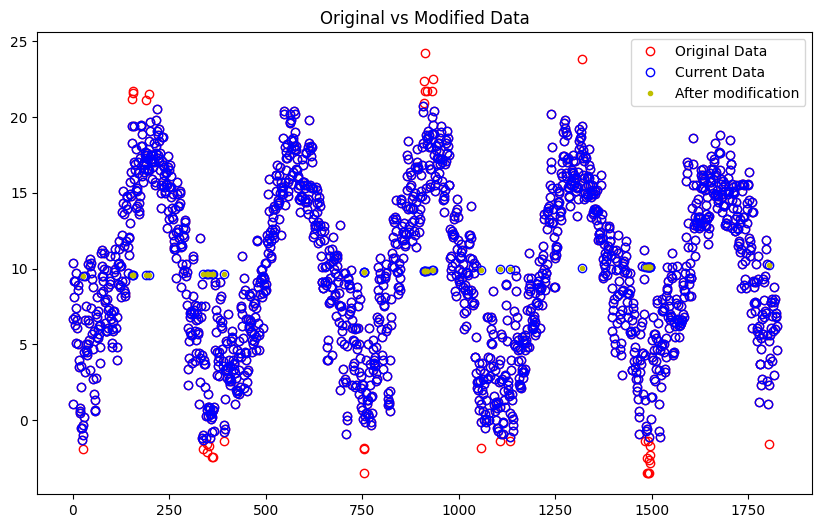

In [26]:
interp_temp = zscore_interp(time_diff, mean_temp, threshold=2, deg=1)
scatter_plot(mean_temp, interp_temp)

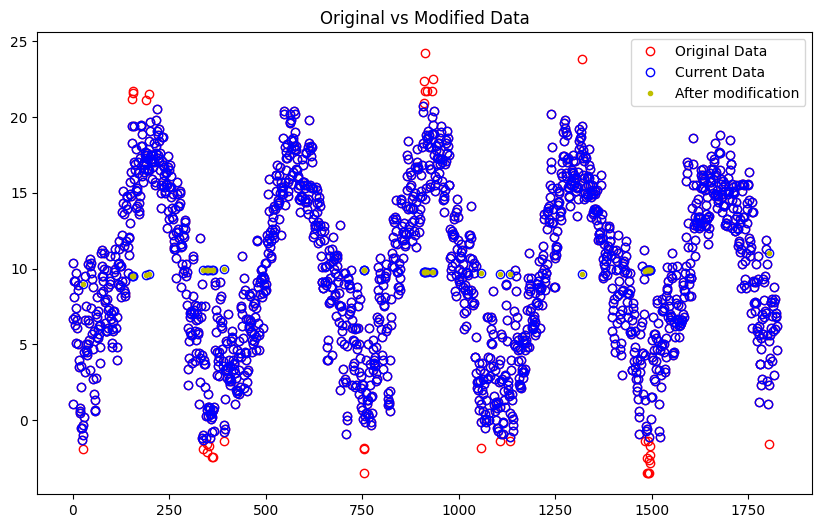

In [27]:
interp_temp = zscore_interp(time_diff, mean_temp, threshold=2, deg=3)
scatter_plot(mean_temp, interp_temp)

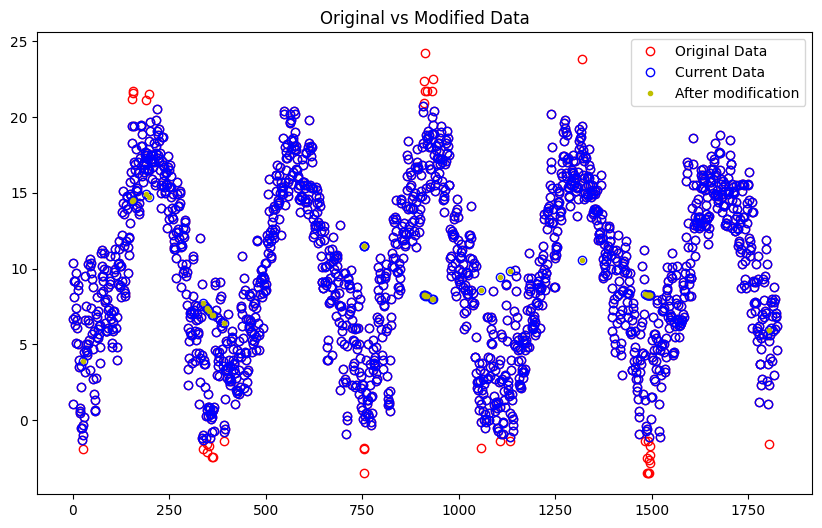

In [28]:
interp_temp = zscore_interp(time_diff, mean_temp, threshold=2, deg=11)
scatter_plot(mean_temp, interp_temp)

C:\Users\qy\AppData\Local\Temp\ipykernel_6536\2745930347.py:20: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(clean_x, clean_y, deg)


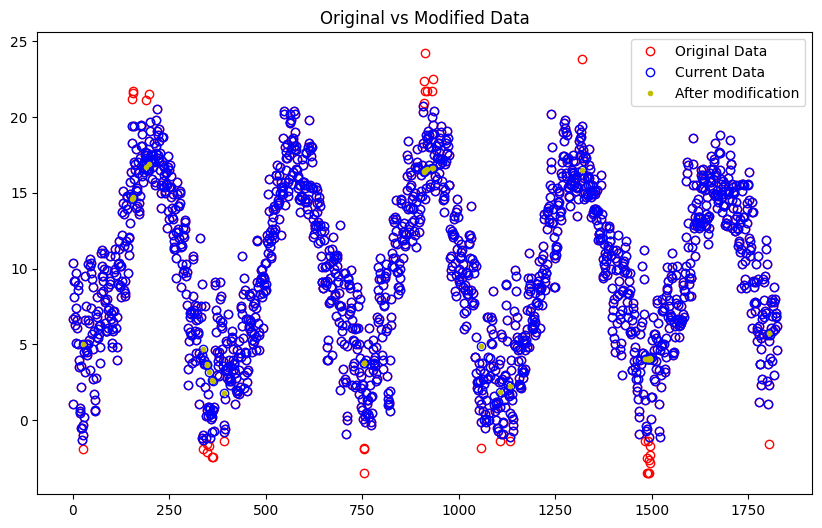

In [29]:
interp_temp = zscore_interp(time_diff, mean_temp, threshold=2, deg=23)
scatter_plot(mean_temp, interp_temp)